# Prediction of Stock Price WE10-RNN

## Stock prediction for Penske Automotive Group, Inc. (PAG)
Source: Yahoo! (2023, April 24). Penske Automotive Group, Inc. (PAG) Stock Historical Prices &amp; Data. Yahoo! Finance. Retrieved April 2023, from https://finance.yahoo.com/quote/PAG/history?period1=1666483200&amp;period2=1682208000&amp;interval=1d&amp;filter=history&amp;frequency=1d&amp;includeAdjustedClose=true 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

## Loading data

In [2]:
pag_df = pd.read_csv('PAG.csv',  parse_dates=True)

In [3]:
pag_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Choosing Target column

In [4]:
pag_df = pag_df[['Close']]

In [5]:
pag_df

,Close
0,100.800003
1,103.809998
2,103.699997
3,108.010002
4,110.660004
...,...
119,142.259995
120,144.339996
121,143.119995
122,141.059998


In [6]:
pag_df['Close'].isna().sum()

0

### No Null values are detected in target data

In [7]:
row_count = pag_df.shape[0] # store the number of obersvations 
row_count

124

In [8]:
temps = pag_df.to_numpy() # to make things easier, we create a numpy array from our dataframe of prices
temps.shape

(124, 1)

In [9]:
sequence_length = 10  # here, lets create a variable to hold the number of days that will be in a sequence. This makes it easier to change later.

In [10]:
temps = temps[row_count % sequence_length: ] # Since our data may not be a multiple of sequence_length, we will ignore 
# the first number of days in order to make the total a number divisible by sequence length
#as there are 250 days which is multiple of 10 we will get the same number of observations
temps.shape

(120, 1)

In [11]:
temps = temps.reshape(row_count // sequence_length, sequence_length) # note that temps are a multiple of sequence length, we can split the data into rows of sequence length.
temps

array([[110.660004, 111.620003, 114.629997, 110.099998, 109.519997,
        110.540001, 112.230003, 113.099998, 113.970001, 124.010002],
       [124.019997, 126.980003, 126.139999, 123.980003, 123.559998,
        124.209999, 124.040001, 125.690002, 125.330002, 125.489998],
       [124.220001, 125.57    , 126.449997, 124.75    , 125.82    ,
        123.650002, 126.029999, 125.57    , 125.720001, 124.639999],
       [125.639999, 121.050003, 123.239998, 121.790001, 118.800003,
        115.610001, 112.089996, 112.68    , 110.169998, 112.279999],
       [112.959999, 111.870003, 114.239998, 114.93    , 113.699997,
        115.620003, 114.580002, 117.5     , 115.400002, 117.779999],
       [120.650002, 121.290001, 118.650002, 115.940002, 115.18    ,
        115.139999, 117.690002, 117.730003, 116.790001, 120.150002],
       [122.57    , 124.690002, 124.610001, 127.82    , 130.720001,
        138.460007, 138.360001, 137.119995, 134.809998, 136.440002],
       [139.199997, 140.080002, 142.46000

In [12]:
# Convert to dataframe

pag_newdf = pd.DataFrame(temps, columns=np.arange(0,10,1))

pag_newdf

,0,1,2,3,4,5,6,7,8,9
0,110.660004,111.620003,114.629997,110.099998,109.519997,110.540001,112.230003,113.099998,113.970001,124.010002
1,124.019997,126.980003,126.139999,123.980003,123.559998,124.209999,124.040001,125.690002,125.330002,125.489998
2,124.220001,125.570000,126.449997,124.750000,125.820000,123.650002,126.029999,125.570000,125.720001,124.639999
3,125.639999,121.050003,123.239998,121.790001,118.800003,115.610001,112.089996,112.680000,110.169998,112.279999
4,112.959999,111.870003,114.239998,114.930000,113.699997,115.620003,114.580002,117.500000,115.400002,117.779999
5,120.650002,121.290001,118.650002,115.940002,115.180000,115.139999,117.690002,117.730003,116.790001,120.150002
6,122.570000,124.690002,124.610001,127.820000,130.720001,138.460007,138.360001,137.119995,134.809998,136.440002
7,139.199997,140.080002,142.460007,146.100006,146.690002,147.360001,154.669998,145.160004,147.600006,145.809998
8,143.830002,144.910004,144.149994,144.720001,143.630005,144.570007,141.839996,144.179993,145.149994,145.520004
9,141.850006,137.050003,134.789993,132.759995,135.059998,130.089996,133.869995,136.050003,133.149994,131.809998


## Standardizing data

In [13]:
# Let's create a single sequence (i.e., feature) for standardization

pag_df_1 = np.array(pag_newdf).ravel().reshape(-1,1)

pag_df_1.shape

(120, 1)

In [14]:
pag_df_1

array([[110.660004],
       [111.620003],
       [114.629997],
       [110.099998],
       [109.519997],
       [110.540001],
       [112.230003],
       [113.099998],
       [113.970001],
       [124.010002],
       [124.019997],
       [126.980003],
       [126.139999],
       [123.980003],
       [123.559998],
       [124.209999],
       [124.040001],
       [125.690002],
       [125.330002],
       [125.489998],
       [124.220001],
       [125.57    ],
       [126.449997],
       [124.75    ],
       [125.82    ],
       [123.650002],
       [126.029999],
       [125.57    ],
       [125.720001],
       [124.639999],
       [125.639999],
       [121.050003],
       [123.239998],
       [121.790001],
       [118.800003],
       [115.610001],
       [112.089996],
       [112.68    ],
       [110.169998],
       [112.279999],
       [112.959999],
       [111.870003],
       [114.239998],
       [114.93    ],
       [113.699997],
       [115.620003],
       [114.580002],
       [117.5

## Standardizing values

In [15]:
# using StandardScaler to standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pag_new_std = scaler.fit_transform(pag_df_1)

In [16]:
#we have 120 rows of data so we can shape them as 12 rows with 10 columns
pag_newdf_reshaped = pag_new_std.reshape(12,10)

pag_newdf_reshaped.shape

(12, 10)

In [17]:
#Pandas version of the reshaped data

pd.DataFrame(pag_newdf_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,-1.569176,-1.487119,-1.229835,-1.617044,-1.666620,-1.579434,-1.434978,-1.360614,-1.286250,-0.428066
1,-0.427212,-0.174201,-0.246001,-0.430630,-0.466531,-0.410971,-0.425502,-0.284465,-0.315237,-0.301561
2,-0.410116,-0.294723,-0.219504,-0.364814,-0.273354,-0.458837,-0.255404,-0.294723,-0.281901,-0.374216
3,-0.288740,-0.681076,-0.493883,-0.617824,-0.873398,-1.146068,-1.446946,-1.396514,-1.611060,-1.430705
4,-1.372581,-1.465750,-1.263171,-1.204192,-1.309329,-1.145213,-1.234109,-0.984518,-1.164018,-0.960584
5,-0.715267,-0.660562,-0.886220,-1.117861,-1.182823,-1.186242,-0.968277,-0.964858,-1.045206,-0.758005
6,-0.551152,-0.369942,-0.376780,-0.102401,0.145481,0.807069,0.798521,0.692530,0.495079,0.634406
7,0.870321,0.945541,1.148975,1.460109,1.510540,1.567809,2.192642,1.379761,1.588324,1.435320
8,1.266077,1.358392,1.293429,1.342151,1.248982,1.329330,1.095979,1.295993,1.378906,1.410533
9,1.096834,0.686547,0.493369,0.319852,0.516449,0.091630,0.414731,0.601071,0.353188,0.238650


## Splitting data

In [18]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(pag_newdf_reshaped,test_size=0.3)



# if we neede to maintain the ordering of the data, we can use the following code to split the data
#split_point = int(len(temp_reshaped)*0.7)
#train, test = temp_reshaped[:split_point], temp_reshaped[split_point:]

In [19]:
train.shape

(8, 10)

In [20]:
train[:2]

array([[-0.42721159, -0.17420079, -0.24600135, -0.43063014, -0.46653067,
        -0.4109709 , -0.42550172, -0.28446549, -0.31523701, -0.30156112],
       [-0.55115219, -0.36994194, -0.37678014, -0.10240082,  0.14548097,
         0.80706921,  0.79852105,  0.69252974,  0.4950794 ,  0.63440635]])

In [21]:
test.shape

(4, 10)

In [22]:
test[:2]

array([[-0.41011596, -0.29472284, -0.21950382, -0.36481353, -0.27335372,
        -0.45883745, -0.25540376, -0.29472284, -0.28190128, -0.37421602],
       [-0.28873957, -0.68107614, -0.49388314, -0.61782374, -0.87339815,
        -1.1460682 , -1.44694573, -1.39651429, -1.61106035, -1.43070495]])

In [23]:
# The first 9 columns (from 0 to 9) are inputs

train_inputs = train[:,:9]

pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,-0.427212,-0.174201,-0.246001,-0.430630,-0.466531,-0.410971,-0.425502,-0.284465,-0.315237
1,-0.551152,-0.369942,-0.376780,-0.102401,0.145481,0.807069,0.798521,0.692530,0.495079
2,-1.569176,-1.487119,-1.229835,-1.617044,-1.666620,-1.579434,-1.434978,-1.360614,-1.286250
3,0.870321,0.945541,1.148975,1.460109,1.510540,1.567809,2.192642,1.379761,1.588324
4,0.655775,1.074610,0.938702,0.925881,1.166070,1.131879,1.309670,1.205388,1.029307
5,1.096834,0.686547,0.493369,0.319852,0.516449,0.091630,0.414731,0.601071,0.353188
6,1.266077,1.358392,1.293429,1.342151,1.248982,1.329330,1.095979,1.295993,1.378906
7,-0.715267,-0.660562,-0.886220,-1.117861,-1.182823,-1.186242,-0.968277,-0.964858,-1.045206


In [24]:
train_inputs

array([[-0.42721159, -0.17420079, -0.24600135, -0.43063014, -0.46653067,
        -0.4109709 , -0.42550172, -0.28446549, -0.31523701],
       [-0.55115219, -0.36994194, -0.37678014, -0.10240082,  0.14548097,
         0.80706921,  0.79852105,  0.69252974,  0.4950794 ],
       [-1.56917637, -1.48711907, -1.22983546, -1.6170437 , -1.66662013,
        -1.57943381, -1.43497843, -1.36061435, -1.28624958],
       [ 0.87032093,  0.94554063,  1.14897501,  1.46010921,  1.51053997,
         1.56780911,  2.19264171,  1.37976117,  1.58832388],
       [ 0.65577546,  1.07460956,  0.93870235,  0.92588139,  1.16607005,
         1.1318787 ,  1.3096698 ,  1.20538844,  1.02930721],
       [ 1.09683429,  0.68654707,  0.49336944,  0.31985242,  0.51644851,
         0.09163038,  0.41473128,  0.60107062,  0.35318815],
       [ 1.26607732,  1.35839206,  1.2934291 ,  1.34215128,  1.24898229,
         1.32933032,  1.09597867,  1.29599331,  1.37890555],
       [-0.7152668 , -0.66056196, -0.8862197 , -1.11786089, -1

In [25]:
train_inputs.shape 

(8, 9)

In [26]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(8, 9, 1)

In [27]:
train_x

array([[[-0.42721159],
        [-0.17420079],
        [-0.24600135],
        [-0.43063014],
        [-0.46653067],
        [-0.4109709 ],
        [-0.42550172],
        [-0.28446549],
        [-0.31523701]],

       [[-0.55115219],
        [-0.36994194],
        [-0.37678014],
        [-0.10240082],
        [ 0.14548097],
        [ 0.80706921],
        [ 0.79852105],
        [ 0.69252974],
        [ 0.4950794 ]],

       [[-1.56917637],
        [-1.48711907],
        [-1.22983546],
        [-1.6170437 ],
        [-1.66662013],
        [-1.57943381],
        [-1.43497843],
        [-1.36061435],
        [-1.28624958]],

       [[ 0.87032093],
        [ 0.94554063],
        [ 1.14897501],
        [ 1.46010921],
        [ 1.51053997],
        [ 1.56780911],
        [ 2.19264171],
        [ 1.37976117],
        [ 1.58832388]],

       [[ 0.65577546],
        [ 1.07460956],
        [ 0.93870235],
        [ 0.92588139],
        [ 1.16607005],
        [ 1.1318787 ],
        [ 1.3096698 ],
   

In [28]:
# The last column (9) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-0.301561
1,0.634406
2,-0.428066
3,1.435320
4,0.989133
5,0.238650
6,1.410533
7,-0.758005


In [29]:
test.shape

(4, 10)

In [30]:
# The first 9 columns (from 0 to 8) are inputs

test_inputs = test[:,:9]

In [31]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(4, 9, 1)

In [32]:
# The last column is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,-0.374216
1,-1.430705
2,-0.960584
3,0.553204


In [33]:
performance = pd.DataFrame({"model":[], "MSE":[]})

# A normal (cross-sectional) NN

In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.3652
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 1.3057
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2483
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 1.1948
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 1.1442
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0957
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0500
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0094
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.9711
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.9354
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 0.9017
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.8697
Epoch 13/100
1/1 [==============================] - 0

In [35]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 226ms/step


In [36]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [37]:
comparison

,actual,predicted
0,124.639999,125.545441
1,112.279999,123.150528
2,117.779999,124.089264
3,135.490005,137.689774


In [38]:
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [39]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Normal NN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,40.908507


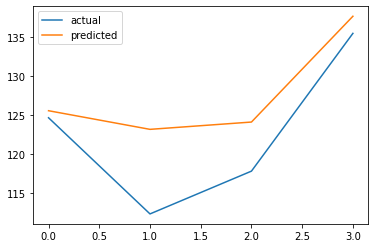

In [40]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# SIMPLE RNN (one layer)

In [41]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.5339
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4840
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4355
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3894
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3456
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3047
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2667
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2320
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2016
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.1749
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1517
Epoch 12/100
1/1 [==============================] - 0s 14ms/step - loss: 0.1324
Epoch 13/100
1/1 [==============================] -

## Prediction

In [43]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 399ms/step


In [44]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [45]:
comparison

,actual,predicted
0,124.639999,125.920189
1,112.279999,121.509438
2,117.779999,122.260971
3,135.490005,138.156433


In [46]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [47]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Simple RNN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,40.908507
0,Simple RNN,28.502593


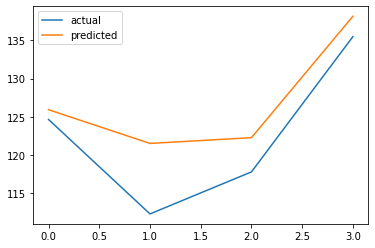

In [48]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## SIMPLE RNN (more layers)

In [49]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.7338
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.5943
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4892
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4169
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3588
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3185
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2853
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2527
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2219
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1955
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1690
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1430
Epoch 13/100
1/1 [==============================] -

### Prediction

In [51]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 822ms/step


In [52]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [53]:
comparison

,actual,predicted
0,124.639999,126.303574
1,112.279999,121.910522
2,117.779999,123.817184
3,135.490005,138.739990


In [54]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [55]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Simple RNN (more layers)', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,40.908507
0,Simple RNN,28.502593
0,Simple RNN (more layers),35.631119


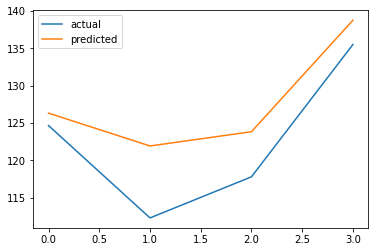

In [56]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM (one layer)

In [57]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.6131
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5888
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5645
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5407
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5169
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4933
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4699
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4466
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4235
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4005
Epoch 11/100
1/1 [==============================] - 0s 25ms/step - loss: 0.3777
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3551
Epoch 13/100
1/1 [==============================] -

## Predicting

In [59]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 466ms/step


In [60]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [61]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [62]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,40.908507
0,Simple RNN,28.502593
0,Simple RNN (more layers),35.631119
0,LSTM RNN,35.374007


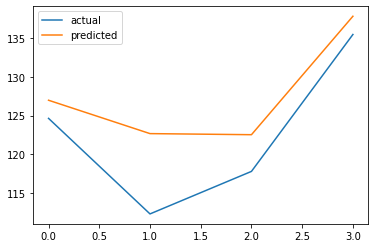

In [63]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM (more layers)

In [64]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 0.9227
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 0.8686
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 0.8169
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 0.7672
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 0.7191
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6724
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 0.6268
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 0.5821
Epoch 9/100
1/1 [==============================] - 0s 38ms/step - loss: 0.5382
Epoch 10/100
1/1 [==============================] - 0s 33ms/step - loss: 0.4948
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - loss: 0.4520
Epoch 12/100
1/1 [==============================] - 0s 26ms/step - loss: 0.4097
Epoch 13/100
1/1 [==============================]

### Predicting

In [66]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 3s 3s/step


In [67]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [68]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [69]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN (more layers)', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,40.908507
0,Simple RNN,28.502593
0,Simple RNN (more layers),35.631119
0,LSTM RNN,35.374007
0,LSTM RNN (more layers),41.744004


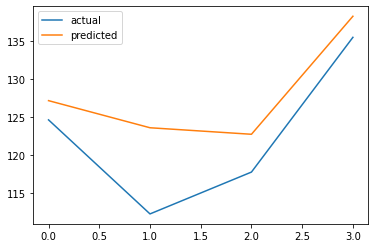

In [70]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## GRU (more layers)

In [71]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.8657
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 0.7326
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6411
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.5687
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.5134
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4657
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4211
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 0.3820
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 0.3396
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 0.3004
Epoch 11/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2664
Epoch 12/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2355
Epoch 13/100
1/1 [==============================] -

### Predicting

In [73]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 856ms/step


In [74]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [75]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [76]:
performance = pd.concat([performance,pd.DataFrame({'model': 'GRU (more layers)', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,40.908507
0,Simple RNN,28.502593
0,Simple RNN (more layers),35.631119
0,LSTM RNN,35.374007
0,LSTM RNN (more layers),41.744004
0,GRU (more layers),37.581878


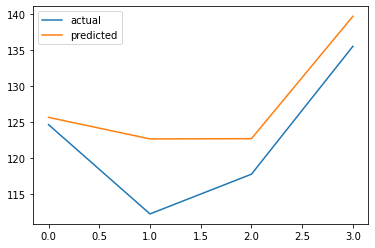

In [77]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Conv1D

In [78]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [79]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.8712
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.8260
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 0.7844
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 0.7451
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 0.7097
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6772
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6459
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6159
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 0.5898
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 0.5664
Epoch 11/100
1/1 [==============================] - 0s 25ms/step - loss: 0.5438
Epoch 12/100
1/1 [==============================] - 0s 25ms/step - loss: 0.5212
Epoch 13/100
1/1 [==============================] -

### Predicting

In [80]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 872ms/step


In [81]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [82]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [83]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Cov1D', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,40.908507
0,Simple RNN,28.502593
0,Simple RNN (more layers),35.631119
0,LSTM RNN,35.374007
0,LSTM RNN (more layers),41.744004
0,GRU (more layers),37.581878
0,Cov1D,24.968934


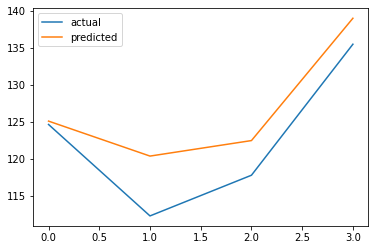

In [84]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [85]:
performance.sort_values(by='MSE')

,model,MSE
0,Cov1D,24.968934
0,Simple RNN,28.502593
0,LSTM RNN,35.374007
0,Simple RNN (more layers),35.631119
0,GRU (more layers),37.581878
0,Normal NN,40.908507
0,LSTM RNN (more layers),41.744004


# ANALYSIS

The model with least MSE is 24.968934 for Cov1D model and the model with highest MSE is LSTM RNN (more layers) with 41.744004 as MSE. 

Among the **RNN, LTSM, Gru, and Conv1D techniques** the best performing model is **Cov1D model** with 24.968934 as MSE( mean squared error) 

Here the LSTM RNN single layer performed better than the LSTM RNN(more layers) and the Simple RNN single layer performed better than the imple RNN (more layers) which is depicting that the performance of the model doesn't always depend on the number of layers inside the model. The simple models performed better than the complex models depicting that the performance doesnt depend on the complexity of the model. Performance depends on the type of analytics we use (type of prediction) and data more than the models layers and complexity.